In [106]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
from sklearn.decomposition import PCA

In [107]:
def unbiased_naive_cov(X):
    ''' Compute the naive unbiased sample covariance matrix (without mean-centering first). '''
    n = len(X)
    return 1/(n-1) * X.T.dot(X)

array([[17.53688347, 15.50907535],
       [15.50907535, 16.7536559 ]])

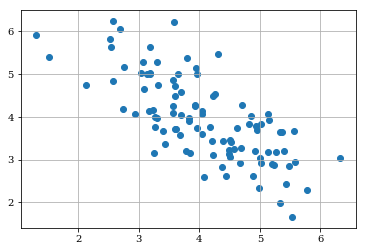

In [108]:
cov_true = np.array([1, -0.8, -0.8, 1]).reshape(2,2)
X = np.random.multivariate_normal(mean=[4,4], cov=cov_true, size=100)
plt.grid()
plt.scatter(X[:,0], X[:,1])
S = unbiased_naive_cov(X)
S

In [109]:
def plot_pc(S, D, title, ax, lower=-8, upper=8):
    # Do PCA
    e, v = np.linalg.eig(S)
    print(e)
    # Get largest eigenvector
    ix = np.argmax(e)
    top = v[:, ix]
    # Compute gradient of largest eigenvector and plot
    m = top[1] / top[0]
    x = np.linspace(lower, upper, 100)
    ax.plot(x, m*x, color='0.50', ls='dashed')
    
    # Plot origin lines
    ax.axhline(0, color='k', lw='.8')
    ax.axvline(0, color='k', lw='.8')
    ax.grid()
    ax.set_title(title)
    # Plot original data
    ax.scatter(D[:, 0], D[:, 1], marker='x', color='k')

[32.65928849  1.63125088]
[0.25877256 1.6312676 ]


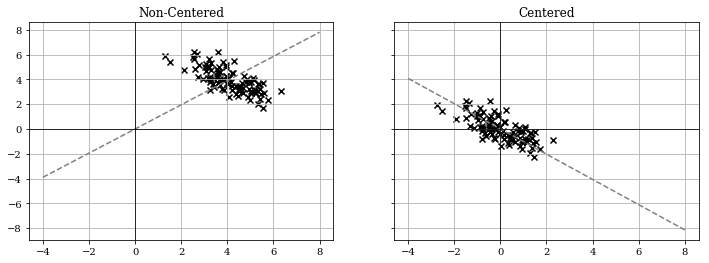

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='all', sharey='all')
plot_pc(S, X, 'Non-Centered', axs[0], lower=-4)
X_c = X - np.mean(X, axis=0)
S_c = unbiased_naive_cov(X_c)
plot_pc(S_c, X_c, 'Centered', axs[1], lower=-4)
plt.savefig('figs/Non-Centered.pdf', format='pdf', dpi=1200, bbox_inches='tight')

[0.25877256 1.6312676 ]
[1.62064349 8.70668195]


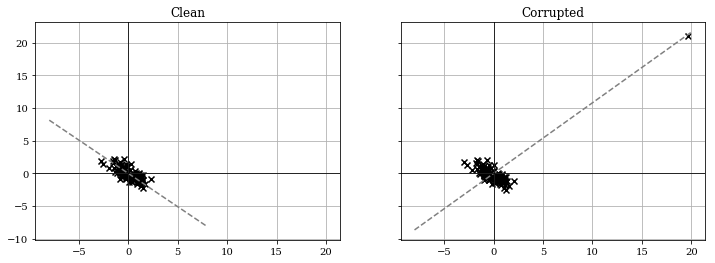

In [112]:
X_ = np.copy(X)
# Corrupt X
X_[0] += 20 
plt.rc('font', family='serif')
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='all', sharey='all')
Z = X - np.mean(X, axis=0)
S = unbiased_naive_cov(Z)
plot_pc(S, Z, 'Clean', axs[0])

Z_ = X_ - np.mean(X_, axis=0)
S_ = unbiased_naive_cov(Z_)
plot_pc(S_, Z_, 'Corrupted', axs[1], upper=20)

plt.savefig('figs/corrupted.pdf', format='pdf', dpi=1200, bbox_inches='tight')

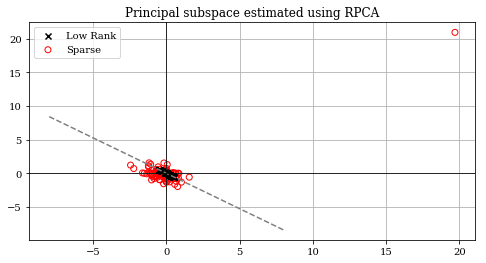

In [113]:
from src.dr.rpca import Rpca
rpca = Rpca()
rpca.setup(Z_)
L, S = rpca.fit(Z_)
plt.figure(figsize=(8,4))

plt.scatter(L[:, 0], L[:, 1], marker='x', c='k', zorder=2, label='Low Rank')
plt.scatter(S[:, 0], S[:, 1], marker='o', edgecolors='r', facecolors='none', zorder=1, label='Sparse')
grad = np.mean(L[:, 1] / L[:, 0])
x = np.linspace(-8, 8)
plt.plot(x, grad*x, color='0.50', ls='dashed')
plt.grid()
plt.axhline(0, color='k', lw='.8')
plt.axvline(0, color='k', lw='.8')

plt.legend()
plt.title('Principal subspace estimated using RPCA')
plt.savefig('figs/rpca_corrupted.pdf', format='pdf', dpi=1200, bbox_inches='tight')